In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

In [25]:
# -----------------------------------------------------------
# Import Iris Dataset
# -----------------------------------------------------------

colnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
df = pd.read_csv('dataset/iris.data', header=None, names=colnames)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


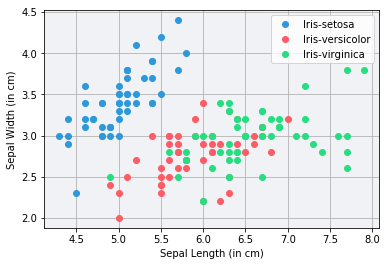

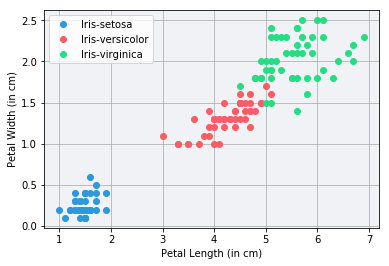

In [26]:
# -----------------------------------------------------------
# Create Visualistaion
# -----------------------------------------------------------

# Plot sepal length vs sepal width
for color, label in zip(['#2d98da', '#fc5c65', '#26de81'], df['label'].unique()):
    subset = df[df['label'] == label]
    plt.plot(subset['sepal_length'], subset['sepal_width'], 'o', color=color, label=label)
plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Sepal Width (in cm)')
plt.grid(True)
plt.legend()
plt.gca().set_facecolor('#f1f2f6')
plt.show()

# Plot petal length vs petal width
for color, label in zip(['#2d98da', '#fc5c65', '#26de81'], df['label'].unique()):
    subset = df[df['label'] == label]
    plt.plot(subset['petal_length'], subset['petal_width'], 'o', color=color, label=label)
plt.xlabel('Petal Length (in cm)')
plt.ylabel('Petal Width (in cm)')
plt.grid(True)
plt.legend()
plt.gca().set_facecolor('#f1f2f6')
plt.show()

In [45]:
X = np.array(df.iloc[:, :4])
y = np.array(df.iloc[:, 4])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)

In [77]:
class KNearestNeighbours:
    def train(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X_test, y_test, k):
        predictions = np.empty((X_test.shape[0], 1), dtype=str)
        for i in range(X_test.shape[0]):
            x = X_test[i, :]
            d = np.sqrt(np.sum(np.square(self.X - x), axis=1))
            labels_of_neighbours = self.y[np.argpartition(d, 7)[:7]]
            predicted_label = Counter(labels_of_neighbours).most_common(1)[0][0]
            predictions[i] = predicted_label
        
        misclassification = 0 #np.sum(y_test == predicitons)
        return predictions, misclassification

kNN = KNearestNeighbours()
kNN.train(X_train, y_train)
kNN.predict(X_test, y_test, 7)

(array([['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I'],
        ['I']], dtype='<U1'), 0)